# LAMMPS Example

Written by Richard Berger (richard.berger@temple.edu)

This is a short demonstration on how to compile and run LAMMPS in Google Colab for interactive testing.

## Install prerequisites

In [1]:
!apt install cmake build-essential git ccache

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
git is already the newest version (1:2.17.1-1ubuntu0.7).
Suggested packages:
  distcc
The following NEW packages will be installed:
  ccache
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 110 kB of archives.
After this operation, 326 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 ccache amd64 3.4.1-1 [110 kB]
Fetched 110 kB in 1s (75.6 kB/s)
Selecting previously unselected package ccache.
(Reading database ... 160975 files and directories currently installed.)
Preparing to unpack .../ccache_3.4.1-1_amd64.deb ...
Unpacking ccache (3.4.1-1) ...
Setting up ccache (3.4.1-1) ...
Updating symlinks in /usr/lib/ccache ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


## Download and Compile LAMMPS

This compiles LAMMPS with a minimal set of options. To add more packages, add more options.

CMAKE_CXX_COMPILER_LAUNCHER=ccache: Caches compilation results with ccache. Subsequent compilations will be faster in case you only add more packages.

BUILD_SHARED_LIBS: Builds LAMMPS as shared library. This is necessary for loading it in Python

LAMMPS_EXCEPTIONS: LAMMPS normally kills the parent process if an error occurs. This would stop the Notebook kernel. By enabling LAMMPS_EXCEPTIONS only C++ exceptions are thrown, which are then turned into Python exceptions. Note, your LAMMPS instance will very likely still be in a bad state and you will have to create a new on. But you will at least know what happened. :-)

PKG_PYTHON: enable the PYTHON package



In [2]:
!rm -rf lammps
!git clone -b stable --depth=1 https://github.com/lammps/lammps.git lammps

Cloning into 'lammps'...
remote: Enumerating objects: 11436, done.
remote: Counting objects: 100% (11436/11436), done.
remote: Compressing objects: 100% (9241/9241), done.
remote: Total 11436 (delta 3944), reused 4516 (delta 2007), pack-reused 0
Receiving objects: 100% (11436/11436), 114.91 MiB | 15.55 MiB/s, done.
Resolving deltas: 100% (3944/3944), done.
Checking out files: 100% (10819/10819), done.


In [3]:
!rm -rf build
!mkdir build
!cd build; cmake -C ../lammps/cmake/presets/minimal.cmake -D CMAKE_INSTALL_PREFIX=/usr -D CMAKE_CXX_COMPILER_LAUNCHER=ccache -D BUILD_SHARED_LIBS=on -D LAMMPS_EXCEPTIONS=on -D PKG_PYTHON=on ../lammps/cmake
!cd build; make -j 2

loading initial cache file ../lammps/cmake/presets/minimal.cmake
-- The CXX compiler identification is GNU 7.5.0
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found Git: /usr/bin/git (found version "2.17.1") 
-- Appending /usr/local/cuda/lib64/stubs to CMAKE_LIBRARY_PATH: /usr/local/cuda/lib64/stubs
-- Running check for auto-generated files from make-based build system
-- Found MPI_CXX: /usr/lib/x86_64-linux-gnu/openmpi/lib/libmpi_cxx.so (found version "3.1") 
-- Found MPI: TRUE (found version "3.1")  
-- Looking for C++ include omp.h
-- Looking for C++ include omp.h - found
-- Found OpenMP_CXX: -fopenmp (found version "4.5") 
-- Found OpenMP: TRUE (found version "4.5")  
-- Found JPEG: /usr/lib/x86_64-linux-gnu/libjpeg.so (found version "80") 
-- Found PNG: /usr/lib/x86_64-l

## Install LAMMPS

In [4]:
!cd build; make install

[  0%] Built target angle.h
[  0%] Built target library.h
[  0%] Built target input.h
[  0%] Built target kspace.h
[  0%] Built target domain.h
[  0%] Built target lattice.h
[  1%] Built target group.h
-- Git Directory: /content/lammps/.git
-- Generating lmpgitversion.h...
[  1%] Built target gitversion
[  1%] Built target force.h
[  1%] Built target fix.h
[  1%] Built target improper.h
[  1%] Built target lmppython.h
[  2%] Built target modify.h
[  2%] Built target atom.h
[  2%] Built target comm.h
[  3%] Built target citeme.h
[  3%] Built target bond.h
[  3%] Built target neigh_list.h
[  3%] Built target lammps.h
[  3%] Built target compute.h
[  3%] Built target timer.h
[  3%] Built target pair.h
[  3%] Built target dihedral.h
[  3%] Built target memory.h
[  3%] Built target error.h
[  3%] Built target lmptype.h
[  3%] Built target neighbor.h
[  3%] Built target output.h
[  3%] Built target pointers.h
[  3%] Built target universe.h
[  4%] Built target region.h
[  4%] Built target upd

## Example

You can now run LAMMPS as standalone-binary

In [5]:
! lmp -in lammps/examples/melt/in.melt

LAMMPS (29 Oct 2020)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:94)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1.6795962 1.6795962 1.6795962
Created orthogonal box = (0.0000000 0.0000000 0.0000000) to (16.795962 16.795962 16.795962)
  1 by 1 by 1 MPI processor grid
Created 4000 atoms
  create_atoms CPU = 0.001 seconds
Neighbor list info ...
  update every 20 steps, delay 0 steps, check no
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 2.8
  ghost atom cutoff = 2.8
  binsize = 1.4, bins = 12 12 12
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair lj/cut, perpetual
      attributes: half, newton on
      pair build: half/bin/atomonly/newton
      stencil: half/bin/3d/newton
      bin: standard
Setting up Verlet run ...
  Unit style    : lj
  Current step  : 0
  Time step     : 0.005
Per MPI rank memory allocation (min/avg/max) = 3.222 | 3.222 | 3.222 Mbytes
Step Temp E_pair E_mol Tot

## Python Example

You can also use the lammps module in Python. Here is a short example using the lammps interface:

In [6]:
from lammps import lammps
import math

L = lammps()

# 3d Lennard-Jones melt

L.command("units lj")
L.command("atom_style atomic")
L.command("atom_modify map array")

L.command("lattice fcc 0.8442")
L.command("region box block 0 4 0 4 0 4")
L.command("create_box 1 box")
L.command("create_atoms 1 box")
L.command("mass 1 1.0")

L.command("velocity all create 1.44 87287 loop geom")

L.command("pair_style lj/cut 2.5")
L.command("pair_coeff 1 1 1.0 1.0 2.5")

L.command("neighbor 0.3 bin")
L.command("neigh_modify delay 0 every 20 check no")

L.command("fix 1 all nve")

L.command("variable fx atom fx")

L.command("info all")

L.command("run 10")

## PyLAMMPS

A more Pythonic way is use the PyLAMMPS/IPyLAMMPS interface:

LAMMPS output is captured by PyLammps wrapper


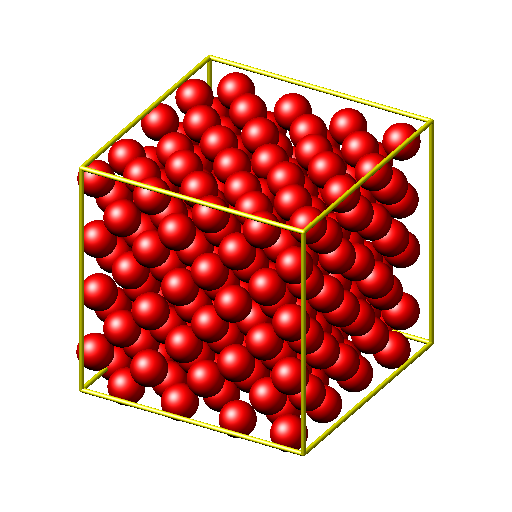

In [8]:
from lammps import IPyLammps
import math

L = IPyLammps()


# 3d Lennard-Jones melt

L.units("lj")
L.atom_style("atomic")
L.atom_modify("map array")

L.lattice("fcc", 0.8442)
L.region("box", "block", 0, 4, 0, 4, 0, 4)
L.create_box(1, "box")
L.create_atoms(1, "box")
L.mass(1, 1.0)

L.velocity("all", "create", 1.44, 87287, "loop geom")

L.pair_style("lj/cut", 2.5)
L.pair_coeff(1, 1, 1.0, 1.0, 2.5)

L.neighbor(0.3, "bin")
L.neigh_modify("delay", 0, "every", 20, "check no")

L.fix("1 all nve")

L.variable("fx atom fx")

L.info("all")

L.run(10)

L.image(zoom=1.0)
